In [1]:
from OptionPricing import *
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
lwidth = 1
lcolor = 'black'

## 1. Poisson Processes

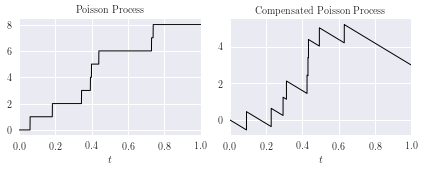

In [3]:
# Poisson & Compensated Poisson Processes

np.random.seed(seed=123)

lam = 6
T = 1
poissonProcess = PoissonProcess(lam=lam, T=T)
poissonProcessCom = PoissonProcess(lam=lam, T=T, compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(poissonProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(poissonProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Poisson Process', fontsize=10)
ax[1].set_title('Compensated Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\poissonPaths.pdf')

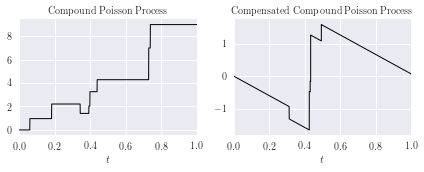

In [4]:
# Compound Poisson & Compensated Compound Poisson Processes

np.random.seed(seed=123)

lam = 6
T = 1
mu_Y = 0.5
sig_Y = 1
compoiProcess = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y))
compoiProcessCom = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y), compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(compoiProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(compoiProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Compound Poisson Process', fontsize=10)
ax[1].set_title('Compensated Compound Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\compoissonPaths.pdf')

## 2. Merton Model

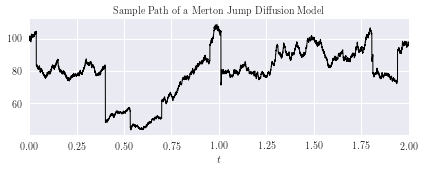

In [5]:
np.random.seed(seed=123)

lam = 4
mu_Y = -0.1
sig_Y = 0.2
sigma = 0.25
r = 0.05
s0 = 100
T = 2
mertonModel = MertonModel(lam=lam, mu_j=mu_Y, sig_j=sig_Y, sigma=sigma, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(mertonModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Merton Jump Diffusion Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\mertonJDPath.pdf')

## 3. NIG Model

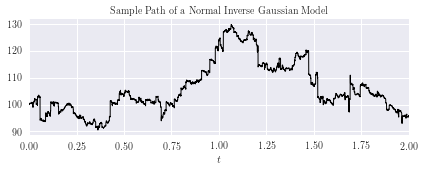

In [6]:
np.random.seed(seed=123)

theta = 0.1
sigma = 0.4
kappa = 0.2
r = 0.05
s0 = 100
T = 2
nigModel = NIGModel(theta=theta, sigma=sigma, kappa=kappa, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(nigModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Normal Inverse Gaussian Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\nigPath.pdf')

## 4. Multi Asset Merton Model

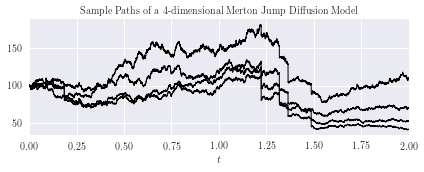

In [75]:
d = 4
lam = 3
mu_j = np.array([-0.1] * d)
sig_j = np.array([0.2] * d)
sig_bm = np.array([0.25] * d)
np.random.seed(seed=321)
eigen_j = np.round(np.random.rand(d-1), 2)
eigen_j = np.append(eigen_j, d - eigen_j.sum())
Corr_j = sp.random_correlation.rvs(eigen_j)
np.random.seed(seed=123)
eigen_bm = np.round(np.random.rand(d-1), 2)
eigen_bm = np.append(eigen_bm, d - eigen_bm.sum())
Corr_bm = sp.random_correlation.rvs(eigen_bm)
r = 0.05
s0 = 100
T = 2

multiMertonModel = MultiAssetMertonModel(d=d, lam=lam, mu_j=mu_j, sig_j=sig_j, sig_bm=sig_bm, 
                                         Corr_j=Corr_j, Corr_bm=Corr_bm, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(multiMertonModel.generatePath(), lw=lwidth, c=lcolor)
ax.set_title('Sample Paths of a ${}$-dimensional Merton Jump Diffusion Model'.format(d), fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\multiMertonJDPath.pdf')

In [80]:
cov_j = np.diag(sig_j) @ Corr_j @ np.diag(sig_j)
cov_bm = np.diag(sig_bm) @ Corr_bm @ np.diag(sig_bm)
print(np.round(cov_j, 3))
print(np.round(cov_bm, 3))

[[ 0.04  -0.013  0.004  0.008]
 [-0.013  0.04  -0.028 -0.002]
 [ 0.004 -0.028  0.04   0.022]
 [ 0.008 -0.002  0.022  0.04 ]]
[[0.063 0.025 0.032 0.025]
 [0.025 0.062 0.043 0.047]
 [0.032 0.043 0.063 0.046]
 [0.025 0.047 0.046 0.063]]
[[1.         0.39835468 0.51536564 0.39656177]
 [0.39835468 1.         0.69535014 0.74853697]
 [0.51536564 0.69535014 1.         0.74318985]
 [0.39656177 0.74853697 0.74318985 1.        ]]


## 5. Multi Asset NIG Model

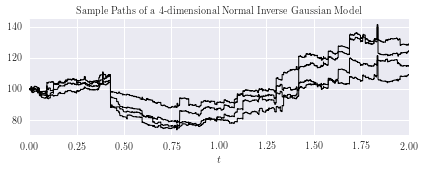

In [79]:
np.random.seed(seed=123)

d = 4
theta = np.array([0.1] * d)
sigma = np.array([0.25] * d)
kappa = 0.2
eigen_bm = np.round(np.random.rand(d-1), 2)
eigen_bm = np.append(eigen_bm, d - eigen_bm.sum())
Corr_bm = sp.random_correlation.rvs(eigen_bm)
r = 0.05
s0 = 100
T = 2
multiNigModel = MultiAssetNIGModel(d=d, theta=theta, sigma=sigma, kappa=kappa, Corr=Corr_bm, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(multiNigModel.generatePath(), lw=lwidth, c=lcolor)
ax.set_title('Sample Paths of a ${}$-dimensional Normal Inverse Gaussian Model'.format(d), fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\multiNigPath.pdf')

In [85]:
np.array([0,1,10,0]).reshape((4,1)) * multiNigModel.generateValues(10)

array([[[   0.        ],
        [  76.39368336],
        [ 798.07187342],
        [   0.        ]],

       [[   0.        ],
        [  87.98013128],
        [ 833.03521101],
        [   0.        ]],

       [[   0.        ],
        [  95.46638991],
        [1077.98294799],
        [   0.        ]],

       [[   0.        ],
        [ 135.88819069],
        [1183.96684137],
        [   0.        ]],

       [[   0.        ],
        [  77.74279975],
        [ 731.53203721],
        [   0.        ]],

       [[   0.        ],
        [  87.90964072],
        [ 960.98182407],
        [   0.        ]],

       [[   0.        ],
        [  57.41660121],
        [1236.01456144],
        [   0.        ]],

       [[   0.        ],
        [ 153.96689722],
        [ 576.390413  ],
        [   0.        ]],

       [[   0.        ],
        [  61.71985495],
        [ 671.17795793],
        [   0.        ]],

       [[   0.        ],
        [  50.5949665 ],
        [ 668.09846148],
       